
## 실습 문제: 수락 확률(Acceptance Probability) 시각화

**설명**:
Simulated Annealing의 핵심은 **"더 나쁜 해를 확률적으로 받아들이는 것"**입니다. 이 확률은 **온도(Temperature)**와 **에너지 차이(Delta E)**에 의해 결정됩니다.

이 실습에서는 볼츠만 분포(Boltzmann distribution) 공식 $P = e^{-\frac{\Delta E}{T}}$ 를 직접 구현하고, 온도가 변함에 따라 수락 확률이 어떻게 변하는지 그래프로 확인하여 직관을 얻습니다.

**요구사항**:
1.  `acceptance_probability` 함수를 완성하세요.
    * `delta_e`: $NewCost - CurrentCost$ (양수일 때 나쁜 이동)
    * `temperature`: 현재 온도 $T$
    * 공식: `math.exp(-delta_e / temperature)` (Numpy의 `np.exp` 사용 권장)
2.  제공된 시각화 코드를 실행하여, 온도가 높을 때와 낮을 때 확률 곡선의 차이를 분석하세요.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def acceptance_probability(delta_e: float, temperature: float) -> float:
    """
    Simulated Annealing의 수락 확률을 계산합니다.

    Args:
        delta_e (float): 비용 차이 (New Cost - Current Cost).
                         양수면 '악화(worse)'된 상태, 음수면 '개선(better)'된 상태.
        temperature (float): 현재 시스템의 온도 (T > 0).

    Returns:
        float: 0.0 ~ 1.0 사이의 수락 확률 값.
    """
    # 1. 개선된 경우 (에너지가 낮아짐): 무조건 수락 (확률 1.0)
    # 2. 온도가 0 이하인 경우: 0으로 나누기 방지를 위해 확률 0.0 반환
    # 3. 악화된 경우: 볼츠만 분포(Boltzmann distribution)에 따라 확률 계산
    # TODO: np.exp()를 사용하여 확률 P = e^(-delta_e / T) 를 계산하고 반환하세요.
    return 0.0 if temperature <= 0 else np.exp(-delta_e / temperature) if delta_e >= 0 else 1.0

    pass

Test (d=2, T=10): 0.8187


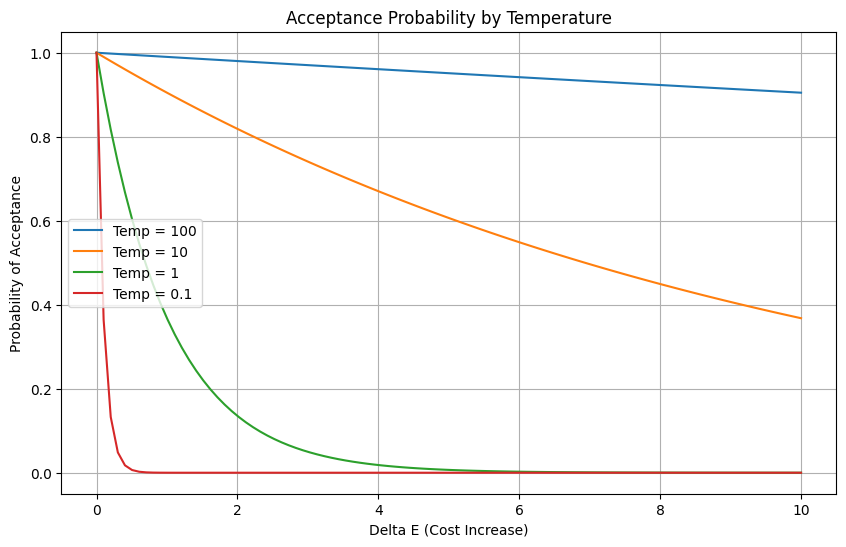

In [4]:
print(f"Test (d=2, T=10): {acceptance_probability(2, 10):.4f}")
delta_values = np.linspace(0, 10, 100) # 비용이 0~10만큼 나빠지는 상황
temperatures = [100, 10, 1, 0.1]       # 다양한 온도 설정

plt.figure(figsize=(10, 6))

for T in temperatures:
    probs = [acceptance_probability(d, T) for d in delta_values]
    plt.plot(delta_values, probs, label=f'Temp = {T}')

plt.title("Acceptance Probability by Temperature")
plt.xlabel("Delta E (Cost Increase)")
plt.ylabel("Probability of Acceptance")
plt.legend()
plt.grid(True)

## 실습 문제: Ackley Function 문제 정의

**설명**:

**Ackley Function**은 최적화 알고리즘을 테스트하기 위한 대표적인 벤치마크 함수입니다. 수많은 **지역 최적해(Local Minima)**가 존재하고, 단 하나의 **전역 최적해(Global Minimum)**가 $(0, 0, ..., 0)$에 위치합니다.

이전의 N-Queens가 **이산(Discrete)** 문제였다면, 이번에는 실수 좌표를 다루는 **연속(Continuous)** 문제입니다.

**Ackley 수식 ($d$차원)**:
$$f(x) = -20 \exp\left(-0.2 \sqrt{\frac{1}{d} \sum_{i=1}^d x_i^2}\right) - \exp\left(\frac{1}{d} \sum_{i=1}^d \cos(2\pi x_i)\right) + 20 + e$$

* **상태(State):** $n$차원 공간의 좌표 벡터 (예: `[1.5, -2.0]`)
* **행동(Action):** 현재 위치에서 이동할 **변화량 벡터(Step Vector)** (예: `[0.1, -0.05]`)
    * N-Queens에서는 "모든 가능한 이동"을 반환했지만, 연속 공간에서는 불가능하므로 **"임의의 랜덤 이동(Random Step)"** 하나를 생성하여 리스트에 담아 반환합니다.
* **결과(Result):** `현재 좌표 + 변화량`을 계산하고, 경계(Bounds)를 벗어나지 않도록 자른(Clip) 새로운 좌표.

**요구사항**:

1.  `actions`: 평균 0, 표준편차 `step_size`인 정규분포(Gaussian Noise)를 사용하여 **하나의 랜덤 이동 벡터(step)**를 생성하고 리스트에 담아 반환하세요.
2.  `result`: `state + action`을 계산하여 이동하고, `np.clip`을 사용하여 좌표가 `bounds`(-5 ~ 5)를 벗어나지 않도록 처리하세요.
3.  `objective_function`: Ackley Function 수식을 Numpy로 구현하세요.


In [ ]:
import numpy as np

class AckleyProblem:
    """
    Ackley Function 최적화 문제를 정의하는 클래스.
    연속 공간(Continuous Space)에서의 최적화 문제를 다룹니다.
    """

    def __init__(self, dimensions: int = 2, bounds: tuple[float, float] = (-5, 5), step_size: float = 0.5):
        """
        Args:
            dimensions (int): 문제의 차원 수 (d)
            bounds (tuple): 탐색 공간의 경계 (min, max)
            step_size (float): 이웃 생성 시 적용할 노이즈의 표준편차
        """
        self.d = dimensions
        self.bounds = bounds
        self.step_size = step_size

    def initial_state(self) -> np.ndarray:
        """
        탐색 공간 내에서 무작위 시작점(초기 상태)을 생성합니다.

        Returns:
            np.ndarray: 차원(d) 크기의 초기 좌표 벡터
        """
        min_b, max_b = self.bounds
        return np.random.uniform(min_b, max_b, size=self.d)

    def actions(self, state: np.ndarray) -> list[np.ndarray]:
        """
        현재 상태에서 이동 가능한 후보 행동(변화량)을 생성합니다.
        연속 공간이므로 '모든 가능한 행동' 대신 '하나의 랜덤 행동(step)'을 생성합니다.

        Args:
            state (np.ndarray): 현재 좌표

        Returns:
            list[np.ndarray]: 하나의 랜덤 스텝 벡터가 담긴 리스트
        """
        # TODO: 평균 0, 표준편차 self.step_size인 정규분포(normal)를 이용하여
        #       차원(self.d) 크기의 랜덤 벡터(step)를 생성하세요.
        step = np.random.normal(0, self.step_size, self.d)

        # TODO: Solver 구조 호환성을 위해 생성된 step을 리스트([])에 담아 반환하세요.
        return [step]
        pass

    def result(self, state: np.ndarray, action: np.ndarray) -> np.ndarray:
        """
        현재 상태에 행동을 적용하여 새로운 상태를 반환합니다.
        경계(bounds)를 벗어나지 않도록 처리(clipping)해야 합니다.

        Args:
            state (np.ndarray): 현재 좌표
            action (np.ndarray): 이동할 변화량 벡터 (step)

        Returns:
            np.ndarray: 이동 후의 새로운 좌표
        """
        new_state = np.clip(state + action, self.bounds[0], self.bounds[1])
        return new_state

    def objective_function(self, state: np.ndarray) -> float:
        """
        Ackley Function 수식을 이용하여 현재 상태의 비용(Energy)을 계산합니다.
        Global Minimum은 0입니다.

        Ackley Function:
          f(x) = -20 * exp(-0.2 * sqrt(1/d * sum(x^2)))
                 - exp(1/d * sum(cos(2pi * x)))
                 + 20 + e

        Args:
            state (np.ndarray): 평가할 좌표 벡터

        Returns:
            float: 계산된 비용 값
        """
        d = self.d

        # TODO: Ackley Function 수식을 구현하세요.
        # 힌트:
        #   - 1/d * sum(x^2) 부분 계산 (np.sum, 제곱 연산)
        #   - 1/d * sum(cos(2pi * x)) 부분 계산 (np.cos, np.pi, np.sum)
        #   - np.exp, np.sqrt 등을 조합하여 최종 식 완성
        t1 = 1/d * np.sum(state**2)
        t2 = 1/d * np.sum(np.cos(2*np.pi * state))
        
        return -20 * np.exp(-0.2 * np.sqrt(t1)) - np.exp(t2) + 20 + np.e
        pass

In [6]:
import numpy as np

class AckleyProblem:
    def __init__(self, dimensions=2, bounds=(-5, 5), step_size=0.5):
        self.d = dimensions
        self.bounds = bounds
        self.step_size = step_size

    def initial_state(self):
        min_b, max_b = self.bounds
        return np.random.uniform(min_b, max_b, size=self.d)

    def actions(self, state):
        # 표준편차 step_size인 정규분포 노이즈 생성
        step = np.random.normal(0, self.step_size, size=self.d)
        # Solver의 for loop를 위해 리스트로 감싸서 반환
        return [step]

    def result(self, state, action):
        new_state = np.clip(state + action, self.bounds[0], self.bounds[1])
        return new_state

    def objective_function(self, state):
        # 1. 첫 번째 항 (제곱합 부분)
        sum_sq = np.sum(state**2)
        term1 = -20 * np.exp(-0.2 * np.sqrt(sum_sq / self.d))

        # 2. 두 번째 항 (코사인합 부분) -> 여기에 np.sum() 추가 필수!
        sum_cos = np.sum(np.cos(2 * np.pi * state))
        term2 = -np.exp(sum_cos / self.d)

        return term1 + term2 + 20 + np.e

In [10]:
problem = AckleyProblem(dimensions=2)

# 1. 초기 상태 테스트
start = problem.initial_state()
print(f"Initial State: {start}")

# 2. 행동(Action) 생성 테스트
actions = problem.actions(start)
step = actions[0]
print(f"Random Step (Action): {step}")

# 3. 결과(Result) 테스트
next_state = problem.result(start, step)
print(f"Next State: {next_state}")

# 4. 목적 함수 테스트 (원점은 0이어야 함)
origin = np.zeros(2)
cost = problem.objective_function(origin)
print(f"Cost at origin (should be near 0): {cost}")

Initial State: [ 4.77484578 -4.66975544]
Random Step (Action): -0.06181156315113798
Next State: [ 4.71303422 -4.731567  ]
Cost at origin (should be near 0): 4.440892098500626e-16



## 실습 문제 3: Simulated Annealing Solver 구현

**설명**:
앞서 구현한 `acceptance_probability`와 `AckleyProblem`을 결합하여, 실제로 최적해를 찾아가는 **Simulated Annealing Solver**를 완성합니다.

N-Queens와 달리 Ackley 문제(연속 공간)에서는 `actions()` 메서드가 내부적으로 **"임의의 랜덤 스텝 하나"**를 생성하여 리스트에 담아 반환합니다. Solver는 이 행동을 실행하여 다음 상태를 평가하면 됩니다.

**요구사항**:
1.  `solve` 메서드의 핵심 루프를 완성하세요.
2.  **행동 및 결과 생성**:
    * `problem.actions(current_state)`를 호출하여 행동 리스트를 받습니다. (Ackley 문제에서는 길이 1인 리스트)
    * 리스트의 첫 번째 행동을 꺼내 `problem.result()`를 호출하여 `next_state`를 만듭니다.
3.  **에너지 평가**: $\Delta E = NewCost - CurrentCost$ 를 계산합니다.
4.  **수락 결정**:
    * $\Delta E < 0$ (개선됨) $\rightarrow$ 무조건 수락
    * $\Delta E \ge 0$ (악화됨) $\rightarrow$ `acceptance_probability` 함수를 사용하여 확률적으로 수락
5.  **냉각**: 반복마다 온도를 `cooling_rate`만큼 곱해서 낮춥니다.


In [18]:
import numpy as np
import math
import random
from typing import Any

class SimulatedAnnealingSolver:
    """
    Simulated Annealing(담금질 기법) 알고리즘을 구현한 Solver 클래스.
    """

    def __init__(self, problem: Any, initial_temp: float = 100.0, cooling_rate: float = 0.99, min_temp: float = 0.001):
        """
        Solver 초기화

        Args:
            problem: 문제 인스턴스 (initial_state, actions, result, objective_function 메서드 포함)
            initial_temp (float): 시작 온도
            cooling_rate (float): 냉각 비율 (0 < rate < 1)
            min_temp (float): 탐색을 종료할 최소 온도
        """
        self.problem = problem
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate
        self.min_temp = min_temp

    def solve(self) -> tuple[Any, float, list[float]]:
        """
        SA 알고리즘을 실행하여 최적해를 탐색합니다.

        Returns:
            tuple: (best_state, best_cost, history)
                - best_state: 탐색된 최적 상태
                - best_cost: 최적 상태의 비용(목적 함수 값)
                - history: 매 반복마다의 비용 변화 기록 리스트
        """
        # ----------------------------------------------------------------
        # 0. 초기화
        # ----------------------------------------------------------------
        # TODO: 문제의 초기 상태(initial_state)와 초기 비용(cost)을 가져오세요.
        current_state = self.problem.initial_state()
        current_cost = self.problem.objective_function(current_state)

        # TODO: 지금까지 발견한 최적해(Best So Far)를 저장할 변수를 초기화하세요.
        best_state = current_state
        best_cost = current_cost

        # 현재 온도(t) 및 히스토리 초기화
        t = self.initial_temp
        history = []

        # ----------------------------------------------------------------
        # Main Loop: 온도가 식을 때까지 반복
        # ----------------------------------------------------------------
        while t > self.min_temp:

            # [Step 1] 이웃 상태 생성 (Neighbor Generation)
            # ------------------------------------------------------------
            # TODO: 1. problem.actions(current_state)를 호출하여 행동 리스트를 받으세요.
            # TODO: 2. 리스트에서 행동 하나를 선택하세요 (Ackley 문제의 경우 리스트 길이가 1임).
            # TODO: 3. problem.result(current_state, action)를 호출하여 next_state를 생성하세요.
            # (심화: Adaptive Step Size를 적용하고 싶다면 여기서 구현합니다)
            actions = self.problem.actions(current_state)
            action = actions[0]
            next_state = self.problem.result(current_state, action)

            # [Step 2] 에너지(비용) 평가 (Evaluation)
            # ------------------------------------------------------------
            # TODO: next_state의 비용을 계산하고, 현재 비용과의 차이(delta_e)를 구하세요.
            # delta_e = new_cost - current_cost

            next_cost = self.problem.objective_function(next_state)
            delta_e = next_cost - current_cost

            # [Step 3] 수락 여부 결정 (Acceptance Decision)
            # ------------------------------------------------------------
            # TODO: 아래 조건에 따라 상태를 업데이트할지 결정하세요.
            #   조건 A: 해가 개선되었으면 (delta_e < 0) -> 무조건 수락
            #   조건 B: 해가 악화되었으면 -> acceptance_probability() 확률에 따라 수락
            #   힌트: if delta_e < 0 or random.random() < acceptance_probability(...):

            # (구현 공간)
            if random.random() < acceptance_probability(delta_e, t) :
                current_cost = next_cost
                current_state = next_state


            # [Step 4] Global Best 갱신
            # ------------------------------------------------------------
            # TODO: 만약 현재 비용이 역대 최고 기록(best_cost)보다 좋다면 갱신하세요.

            # (구현 공간)
            if current_cost < best_cost :
                best_cost = current_cost
                best_state = current_state


            # [Step 5] 온도 냉각 (Cooling)
            # ------------------------------------------------------------
            # TODO: 온도를 cooling_rate 비율만큼 감소시키세요.

            t = t * self.cooling_rate

            # 히스토리 기록
            history.append(current_cost)

        # 최적해 반환
        return best_state, best_cost, history

Optimization Result:
  - Final Cost: 0.000948
  - Best State (First 3 dims): [0.00023616 0.00023616 0.00023616]...


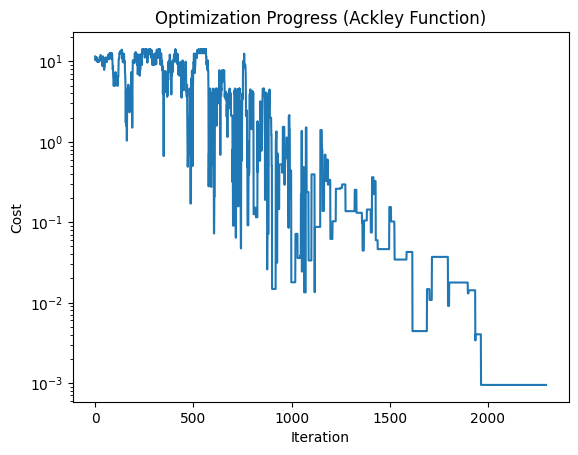

In [19]:
# 문제 정의 (Numpy Ackley)
problem = AckleyProblem(dimensions=5, step_size=0.5) # 5차원 문제

# Solver 실행 (하이퍼파라미터를 찾아 보세요, 파라미터 튜닝의 중요성을 기억하세요!)
solver = SimulatedAnnealingSolver(
    problem,
    initial_temp=100.0,
    cooling_rate=0.995,
    min_temp=1e-3
)

best_state, best_cost, history = solver.solve()

print(f"Optimization Result:")
print(f"  - Final Cost: {best_cost:.6f}")
print(f"  - Best State (First 3 dims): {best_state[:3]}...")

import matplotlib.pyplot as plt
plt.plot(history)
plt.title("Optimization Progress (Ackley Function)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.yscale("log")